#POSTTEST 5
---
### Gerry Hasrom
### 2209106094
---
> Dataset yang digunakan adalah dataset bawaan dari tensorflow yaitu Fashion-MNIST. <br>
> Link Github Dataset : https://github.com/keras-team/keras/blob/v3.3.3/keras/src/datasets/fashion_mnist.py#L12-L96 <br>
> Atau bisa juga cari di google dengan keyword pencarian "from tensorflow.keras.datasets import fashion_mnist"

#### Tahap 1 : Import seluruh library yang dibutuhkan
---
> Dimulai dengan import library, kaya numpy untuk manipulasi array, matplotlib.pyplot untuk visualisasi gambar, dan beberapa modul dari tensorflow.keras untuk memuat dataset, membuat model deep learning, serta mendefinisikan layer seperti Dense, Flatten, dan Dropout. <br>
> Baru setelah itu dataset saya Fashion MNIST dimuat menggunakan fashion_mnist.load_data() yang langsung dibagi menjadi set data pelatihan dan set data pengujian pada x train dan y train.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


#### Tahap 2 : Cek ukuran data training dan data training
---
> Hanya untuk cek saja, seberapa banyak ukurannya


In [3]:
# Cek ukuran dari data training dan testing dataset saya
print(f'Ukuran data training: {x_train.shape}')
print(f'Ukuran data testing: {x_test.shape}')

Ukuran data training: (60000, 28, 28)
Ukuran data testing: (10000, 28, 28)


#### Tahap 3 : Hitung total ukuran dataset melalui data training dan data testing
---
> Cek berapa ukuran(mb) dataset saya


In [4]:
# Hitung ukuran data training dan testing dalam MB (Untuk keperluan seberapa besar dataset yang saya gunakan)
train_size = x_train.nbytes
test_size = x_test.nbytes

print(f'Ukuran memori untuk data training: {train_size / (1024 * 1024):.2f} MB')
print(f'Ukuran memori untuk data testing: {test_size / (1024 * 1024):.2f} MB')

Ukuran memori untuk data training: 44.86 MB
Ukuran memori untuk data testing: 7.48 MB


#### Tahap 4 : Cek isi dataset
---
> Hanya untuk cek saja dengan menampilkan isi 10 sampel dari dataset


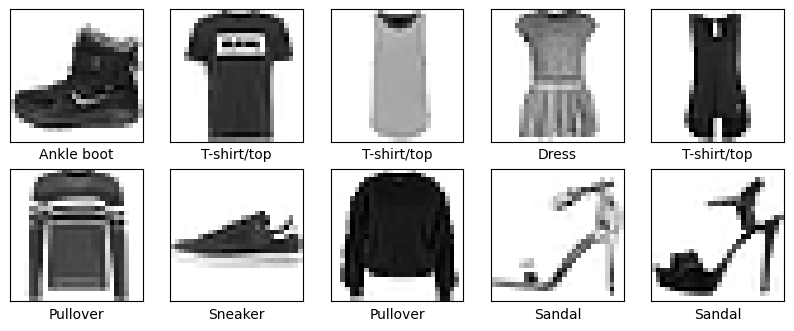

In [5]:
# Memuat dataset Fashion MNIST (dataset bawaan tensorflow)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# kelas sesuai label pada database fashion
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Untuk menampilkan gambar dari dataset (Hanya untuk cek isi dari dataset fashion saya)
def show_sample_images(images, labels, class_names, num_samples=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        # Mengambil nama kelas berdasarkan label
        plt.xlabel(class_names[int(labels[i])])
    plt.show()

# Menampilkan 10 sampel pertama dari dataset training
show_sample_images(x_train, y_train, class_names, num_samples=10)

#### Tahap 5 : Mengubah pixel value
---
> Mengubah value menjadi rentang 0-1


In [6]:
# Untuk Menormalisasi data (supaya pixel valuenya dari 0-255 menjadi 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#### Tahap 6 : Melakukan one-hot encoding pada data training dan data testing



In [7]:
# Melakukan One-hot encode label data
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#### Tahap 7 : Split data untuk validation

In [8]:
# Split sebagian data training untuk validation sebelum dibuat model sequentialnya
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

#### Tahap 8 : Membuat model sequential

In [9]:
# Buat model sequential
model = Sequential()
model.add(Input(shape=(28, 28))) #Untuk tambah input layer pertama (shape nya 28,28)
model.add(Flatten()) #Flatten untuk mengubah 28x28 gambar menjadi vector 1 dimensi
model.add(Dense(128, activation='relu')) #Tambah hidden layer Dense sebesar 128
model.add(Dropout(0.5)) #Untuk mengurangi overfitting
model.add(Dense(64, activation='relu')) #Tambah hidden layer Dense sebesar 64
model.add(Dense(10, activation='softmax')) #Tambah output layer dengan 10 unit dan menggunakan softmax

#### Tahap 9 : Compile Model

In [10]:
# Melakukan Compile Model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Tahap 10 : Model tadi ditraining
---
> Hasil akurasi yang didapatkan sudah diatas 70%, yang secara langsung menjelaskan datanya bagus.

In [11]:
# Selanjutnya barulah Training model
history = model.fit(x_train, y_train,
                    epochs=20,        #epoch 20
                    batch_size=64,    #dengan memakai batch sebesar 64
                    validation_data=(x_val, y_val))  # Validasi menggunakan data validation

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6612 - loss: 0.9369 - val_accuracy: 0.8330 - val_loss: 0.4464
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8198 - loss: 0.5020 - val_accuracy: 0.8438 - val_loss: 0.4205
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8281 - loss: 0.4651 - val_accuracy: 0.8555 - val_loss: 0.3889
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8401 - loss: 0.4324 - val_accuracy: 0.8643 - val_loss: 0.3663
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8455 - loss: 0.4215 - val_accuracy: 0.8663 - val_loss: 0.3664
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8473 - loss: 0.4111 - val_accuracy: 0.8677 - val_loss: 0.3616
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8516 - loss: 0.3999 - val_accuracy: 0.8711 - val_loss: 0.3531
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8600 - loss: 0.3824 - val_accuracy: 0.

#### Tahap 11 : Melakukan Evaluasi Model Pada Data Testing

In [12]:
# Evaluasi model tadi dengan data testing
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8749 - loss: 0.3498
Test Accuracy: 87.49%


#### Tahap 12 : Hasil data training dan validasi di visualisasi lewat grafik

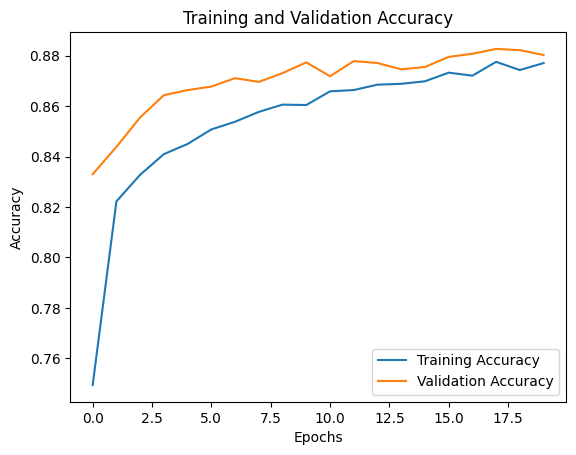

In [13]:
# Visualisasi plot dari hasil training dan validasi
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Tahap 13 : Hasil Loss model data tadi di visualisasi lewat grafik

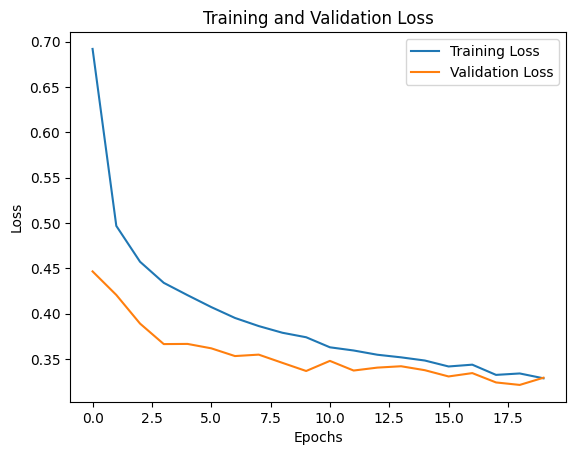

In [14]:
# Visualisasi hitungan Loss dari modelnya
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()